In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [5]:
ais = pd.read_csv('ais.csv')
ais.head

<bound method NDFrame.head of       rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat     lbm     ht     wt  \
0    5.48  6.2  48.2  16.3    94  34.42   82.7   13.91  106.00  189.2  123.2   
1    5.17  8.0  47.9  16.4    36  25.93   88.9   14.53   97.00  209.4  113.7   
2    5.48  4.6  49.4  18.0   132  32.52   55.7    8.51  102.00  185.0  111.3   
3    4.96  8.3  45.3  15.7   141  33.73  113.5   17.41   89.00  179.1  108.2   
4    5.09  8.9  46.3  15.4    44  29.97   71.1   13.97   88.00  185.1  102.7   
..    ...  ...   ...   ...   ...    ...    ...     ...     ...    ...    ...   
197  4.98  6.4  44.8  14.8    80  17.06   47.6   11.07   42.15  166.7   47.4   
198  4.66  6.4  40.9  13.9   109  18.37   38.2    8.45   41.93  157.9   45.8   
199  4.42  6.4  42.8  14.5    63  20.31   58.9   13.46   39.03  149.0   45.1   
200  4.53  5.0  40.7  14.0    41  17.79   56.8   12.55   38.30  156.9   43.8   
201  4.09  4.9  36.0  12.5    66  17.05   41.6    9.10   34.36  148.9   37.8   

    sex  

1. Visualize the distribution of red blood cell count (rcc) by sex (sex).

In [6]:
ais.replace([np.inf, -np.inf], np.nan, inplace=True)
pd.crosstab(index=ais['rcc'], columns=ais['sex'])
ais.groupby('sex').describe()['rcc']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,100.0,4.404500,0.320896,3.80,4.1675,4.385,4.5375,5.33
m,102.0,5.026569,0.350723,4.13,4.8625,5.015,5.1775,6.72


c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


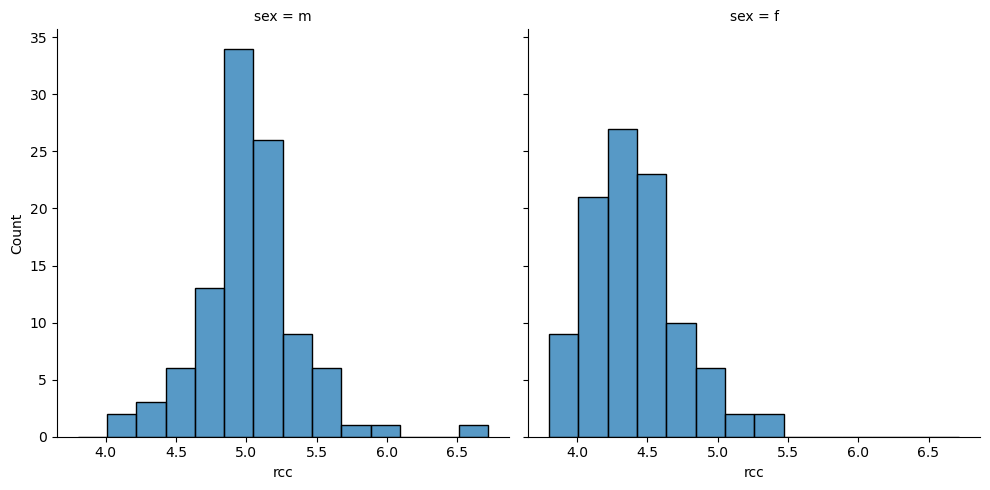

In [7]:
sns.displot(data=ais, x='rcc', col='sex')

plt.savefig('py_hist.png')

plt.show()

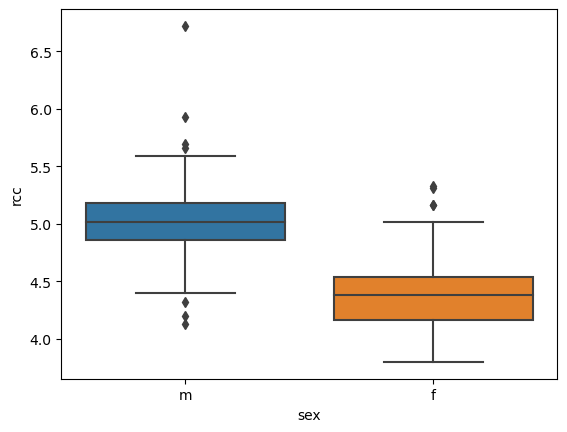

In [8]:
sns.boxplot(x='sex', y='rcc', data=ais)

plt.savefig('py_boxplt.png')

plt.show()

2. Is there a significant difference in red blood cell count between the two groups of sex? 

In [9]:
t_result = stats.ttest_ind(ais[ais['sex']=='f']['rcc'], ais[ais['sex']=='m']['rcc'])
print(f'Because the p-value of {t_result.pvalue} is less than 0.05, there is sufficient evidence to state that there is a significant difference in red blood cell count between the m and f groups.')

Because the p-value of 7.463492766251306e-29 is less than 0.05, there is sufficient evidence to state that there is a significant difference in red blood cell count between the m and f groups.


3. Produce a correlation matrix of the relevant variables in this dataset.

In [10]:
ais[['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']].corr()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913
ht,0.358854,0.076811,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780932


4. Visualize the relationship of height (ht) and weight (wt).

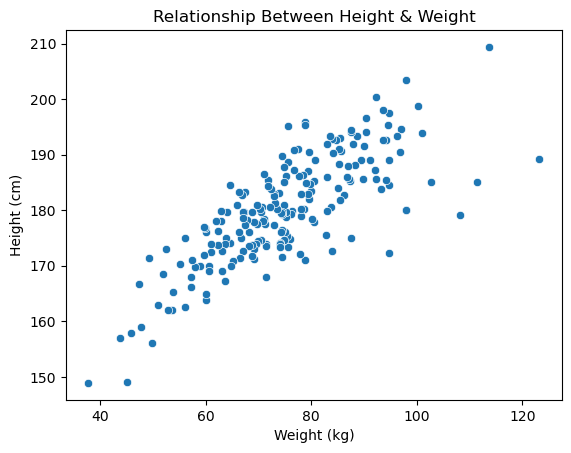

In [11]:
sns.scatterplot(x='wt', y='ht', data=ais)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Relationship Between Height & Weight')

plt.savefig('py_scatter.png')

plt.show()

5. Regress ht on wt. Find the equation of the fit regression line. Is there a significant relationship?

In [12]:
reg_result = stats.linregress(x=ais['wt'], y =ais['ht'])

print(f'Slope:            {reg_result.slope}')
print(f'Intercept:        {reg_result.intercept}')
print(f'R-value:          {reg_result.rvalue}')
print(f'P-value:          {reg_result.pvalue}')

print(f'The equation of the regression line is approximately y = {reg_result.slope:.3f}x + {reg_result.intercept:.3f}.')

Slope:            0.545915261582885
Intercept:        139.15599169604337
R-value:          0.780932071730168
P-value:          9.539370892367334e-43
The equation of the regression line is approximately y = 0.546x + 139.156.


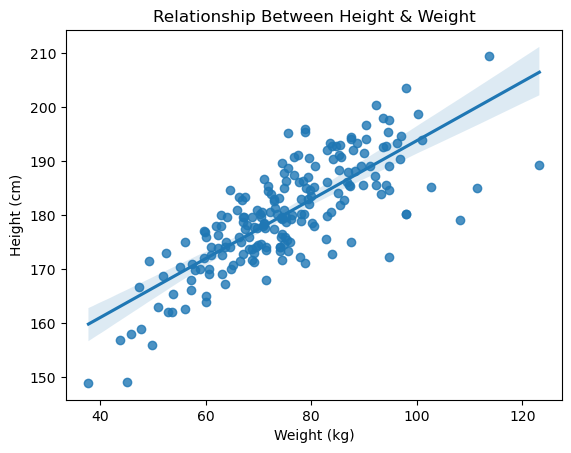

In [13]:
sns.regplot(x='wt', y='ht', data=ais)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Relationship Between Height & Weight')

plt.savefig('py_reg.png')

plt.show()

6. Split your regression model into training and testing subsets. What is the R-squared and RMSE on your test model?

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ais[['wt']], ais[['ht']], random_state=100)
y_train.shape
y_test.shape

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
coefficients = regr.coef_
coefficients_str = ', '.join(f'{coef:.3f}' for coef in np.ravel(coefficients))

print(f'The proportion of change in weight that can be attributed to height is approximately {coefficients_str} (the regression coefficient).')
print(f'The R-squared value on the test model is approximately {metrics.r2_score(y_test, y_pred):.3f}.')
print(f'The RMSE (R mean squared error) on the test model is approximately {metrics.mean_squared_error(y_test, y_pred):.3f}')

The proportion of change in weight that can be attributed to height is approximately 0.550 (the regression coefficient).
The R-squared value on the test model is approximately 0.612.
The RMSE (R mean squared error) on the test model is approximately 29.018
